Project pt.1 / Samuele / width and lenght distribution

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
#load data

In [ ]:
!cat /home/samu/LaboratoryOfComputationalPhysics_Y7/Project/magic04.data  ## show data

In [1]:
import numpy as np
import pandas as pd
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd


In [2]:
#file_name="/home/samu/LaboratoryOfComputationalPhysics_Y7/Project/magic04.data"
file_name="magic04.data"
data = pd.DataFrame(pd.read_csv(file_name))
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']
data   
#### save data in a DataFrame


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,category
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


# punto 1 (Luca)
Study the features of the datasets and compare them for signal and background events

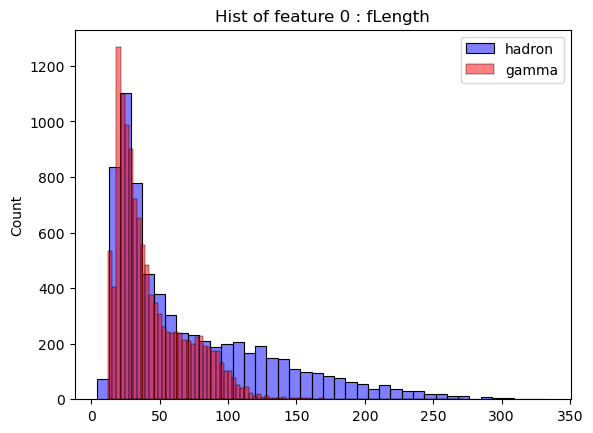

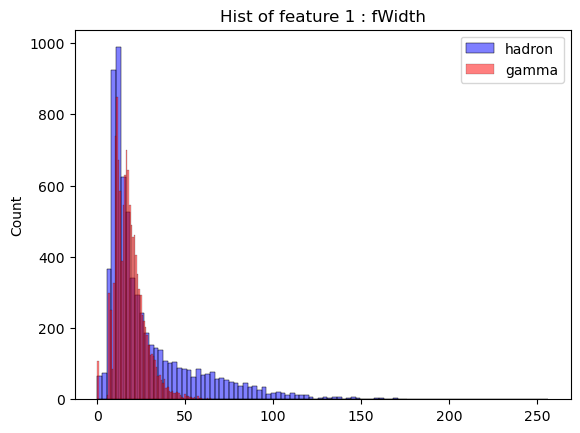

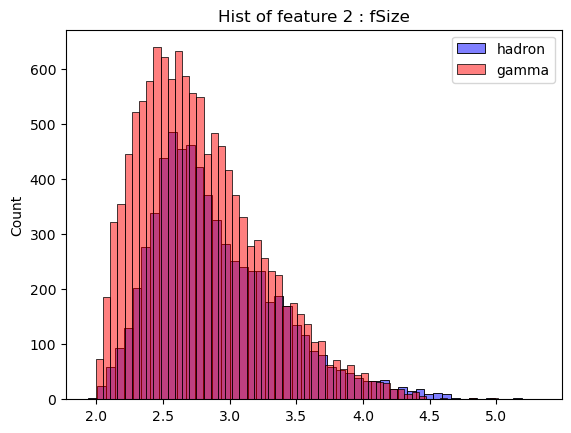

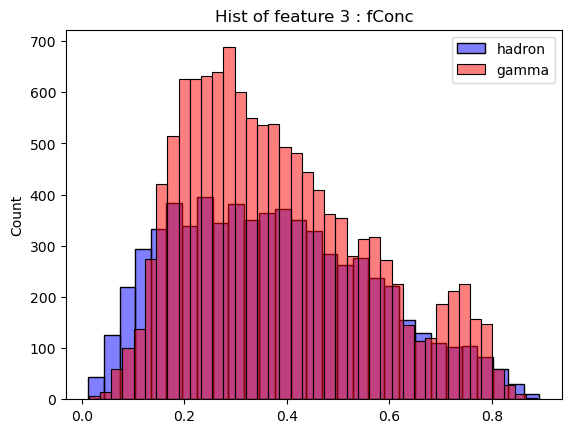

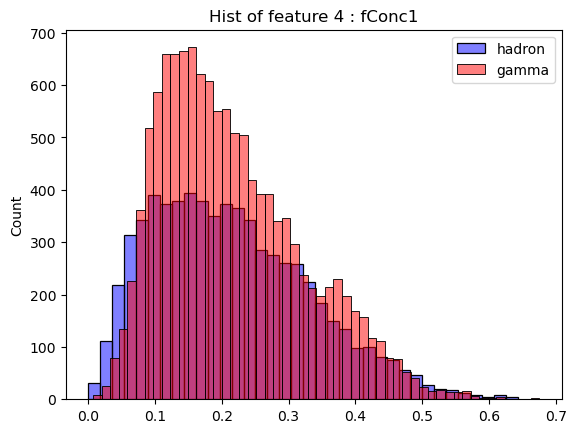

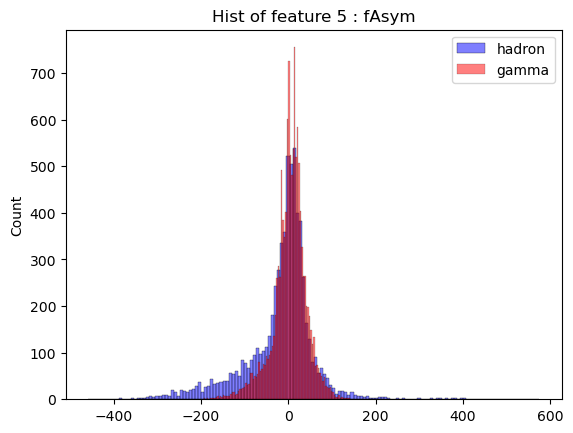

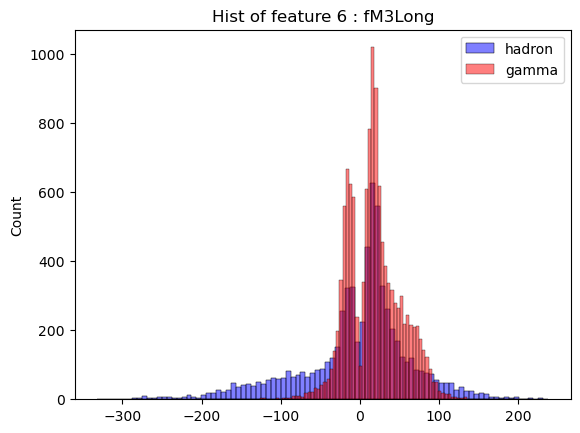

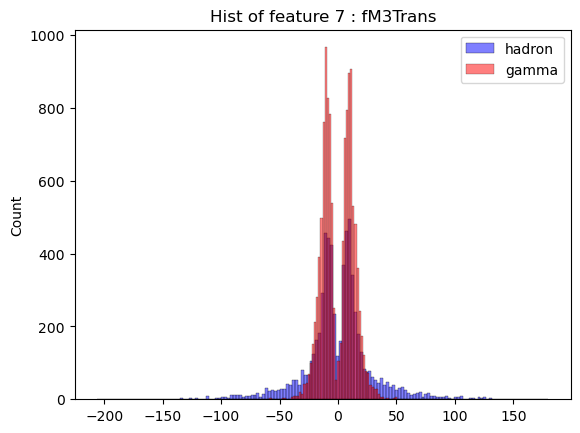

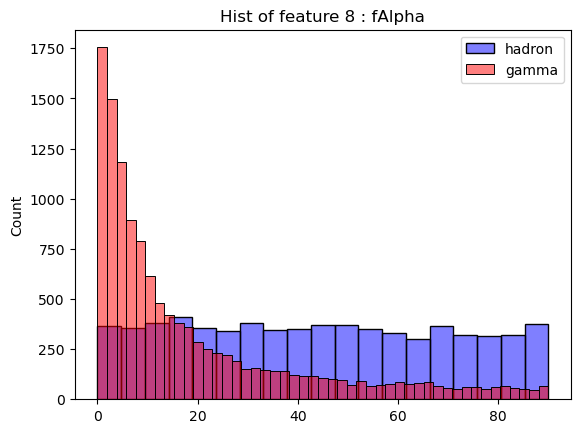

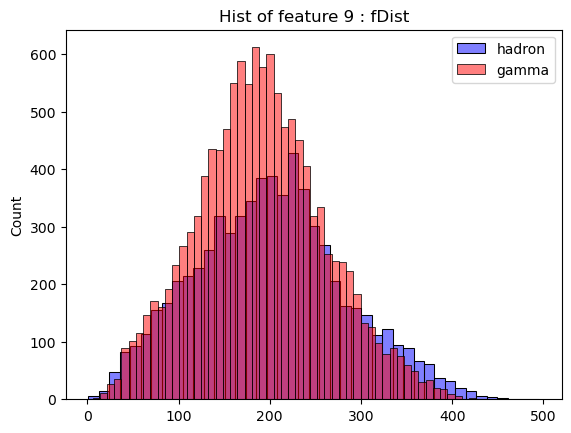

In [5]:
# making director for saving plots
import os

dir_name = 'punto_1_plots'

if not os.path.exists(dir_name):
    os.makedirs(dir_name)


# X contains features, Y contains categories
X = data.loc[:,'fLength':'fDist']
Y = data.loc[:,'category']

for i in range(X.shape[1]):
    x_g = []
    x_h = []
    X_temp = X[str(X.columns[i])]
    for j in range(X.shape[0]):
        if (Y[j] == 'g'):
            x_g.append(X_temp[j])
        if (Y[j] == 'h'):
            x_h.append(X_temp[j])
    
    titolo = 'Hist of feature ' + str(i) + ' : ' + X.columns[i]
    img_name = 'hist_'+str(i)+'_'+X.columns[i]+'.png'
    sns.histplot(x_h,label='hadron',alpha=0.5,color='blue',edgecolor='black')
    sns.histplot(x_g,label='gamma',alpha=0.5,color='red',edgecolor='black')
    plt.title(titolo)
    plt.legend()
    plt.savefig(os.path.join(dir_name, img_name))
    plt.show()
    
# plot are saved in a folder named 'punto_1_plots'

# punto 2 (Luca)
Study the correlations among the features of the datasets for signal and background events

Rescaling features to average = 0 and std = 1

In [8]:
X_rescaled = X
for i in range(X.shape[1]):
    h = X[str(X.columns[i])]
    avg = np.average(h)
    std = np.std(h)
    h = h - avg
    h = h / std
    X_rescaled[str(X_rescaled.columns[i])] = h
    


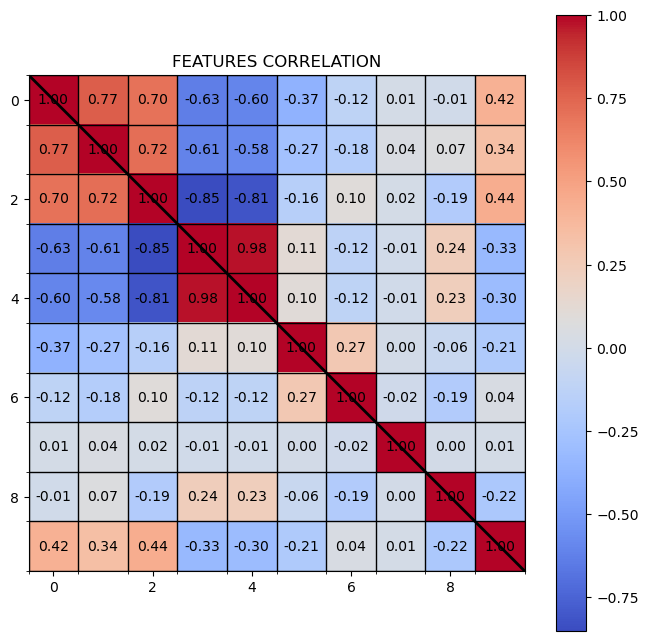

In [9]:
# too much memory is needed to compute np.cov(X,X)
# we're going to do this label by label

cov = np.zeros((X_rescaled.shape[1],X_rescaled.shape[1]))
for i in range(X_rescaled.shape[1]):
    h = X_rescaled[str(X_rescaled.columns[i])]
    for j in range(X_rescaled.shape[1]):
        v = X_rescaled[str(X_rescaled.columns[j])]
        cov[i,j] = (np.cov(h,v)[0,1])
            
ticks = np.arange(0,10,1)
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(cov, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)
ax.set_xticks(np.arange(-0.5, cov.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, cov.shape[0], 1), minor=True)
ax.grid(which='minor', color='black', linewidth=1)

for i in range(cov.shape[0]):
    for j in range(cov.shape[1]):
        ax.text(j, i, f'{cov[i, j]:.2f}', ha='center', va='center', color='black', fontsize=10) # adds covariance text to each grid
ax.plot([-0.5, cov.shape[1]-0.5], [-0.5, cov.shape[0]-0.5], color='black', linewidth=2, linestyle='-')
plt.title('FEATURES CORRELATION')
#for i in range(cov.shape[0]):
#    for j in range(cov.shape[1]):
#        plt.text(j, i, f'{cov[i, j]:.2f}', ha='center', va='center', color='white', fontsize=8)
plt.show()

In [10]:
print('correlation of f0 and f1:',cov[0,1])
print('correlation of f0 and f2:',cov[0,2])
print('correlation of f3 and f4:',cov[3,4])
print('correlation of f2 and f3:',cov[2,3])
print('correlation of f2 and f4:',cov[2,4])

correlation of f0 and f1: 0.7705513795510619
correlation of f0 and f2: 0.70248796209105
correlation of f3 and f4: 0.9764643541477492
correlation of f2 and f3: -0.8508966163126173
correlation of f2 and f4: -0.8088840867977051


Looks like we have good correlation between
- features 0-1
- features 0-2
- features 3-4

And good anti-correlation between
- features 2-3
- features 2-4

In [11]:
Xg_rescaled = X_rescaled[Y == 'g']
Xh_rescaled = X_rescaled[Y == 'h']

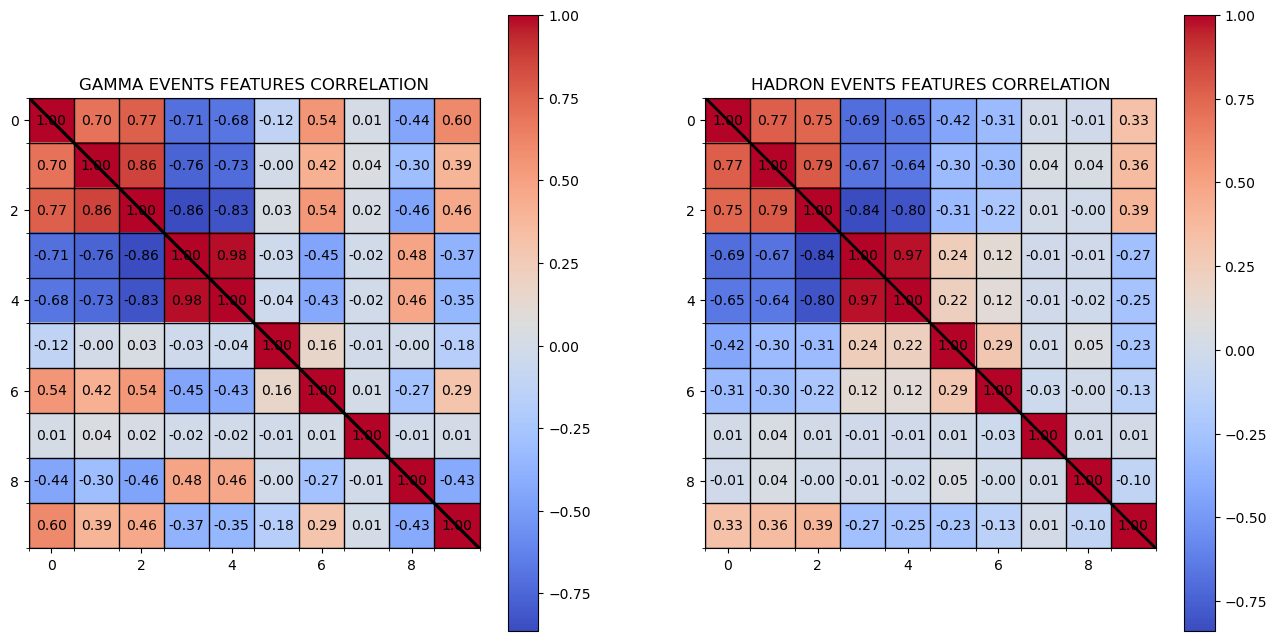

In [12]:
# too much memory is needed to compute np.cov(X,X)
# we're going to do this label by label

cov = np.zeros((Xg_rescaled.shape[1],Xg_rescaled.shape[1]))
for i in range(Xg_rescaled.shape[1]):
    h = Xg_rescaled[str(Xg_rescaled.columns[i])]
    for j in range(Xg_rescaled.shape[1]):
        v = Xg_rescaled[str(Xg_rescaled.columns[j])]
        cov[i,j] = (np.cov(h,v)[0,1])
        
std_devs = np.std(Xg_rescaled, axis=0)
cov = cov / np.outer(std_devs, std_devs) # the data for gamma events are not normalized with respect to themselves   

ticks = np.arange(0,10,1)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
cax = ax[0].imshow(cov, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)
ax[0].set_xticks(np.arange(-0.5, cov.shape[1], 1), minor=True)
ax[0].set_yticks(np.arange(-0.5, cov.shape[0], 1), minor=True)
ax[0].grid(which='minor', color='black', linewidth=1)

## add values on top of each cell
for i in range(cov.shape[0]):
    for j in range(cov.shape[1]):
        ax[0].text(j, i, f'{cov[i, j]:.2f}', ha='center', va='center', color='black', fontsize=10)

ax[0].plot([-0.5, cov.shape[1]-0.5], [-0.5, cov.shape[0]-0.5], color='black', linewidth=2, linestyle='-')
ax[0].plot([-0.5, cov.shape[1]-0.5], [-0.5, cov.shape[0]-0.5], color='black', linewidth=2, linestyle='-')
ax[0].set_title('GAMMA EVENTS FEATURES CORRELATION')

cov = np.zeros((Xh_rescaled.shape[1],Xh_rescaled.shape[1]))
for i in range(Xh_rescaled.shape[1]):
    h = Xh_rescaled[str(Xh_rescaled.columns[i])]
    for j in range(Xh_rescaled.shape[1]):
        v = Xh_rescaled[str(Xh_rescaled.columns[j])]
        cov[i,j] = (np.cov(h,v)[0,1])
        
std_devs = np.std(Xh_rescaled, axis=0)
cov = cov / np.outer(std_devs, std_devs)

cax = ax[1].imshow(cov, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)
ax[1].set_xticks(np.arange(-0.5, cov.shape[1], 1), minor=True)
ax[1].set_yticks(np.arange(-0.5, cov.shape[0], 1), minor=True)
ax[1].grid(which='minor', color='black', linewidth=1)

for i in range(cov.shape[0]):
    for j in range(cov.shape[1]):
        ax[1].text(j, i, f'{cov[i, j]:.2f}', ha='center', va='center', color='black', fontsize=10)

ax[1].plot([-0.5, cov.shape[1]-0.5], [-0.5, cov.shape[0]-0.5], color='black', linewidth=2, linestyle='-')
ax[1].set_title('HADRON EVENTS FEATURES CORRELATION')

plt.show()


# Correlation between features and label (Jonny)

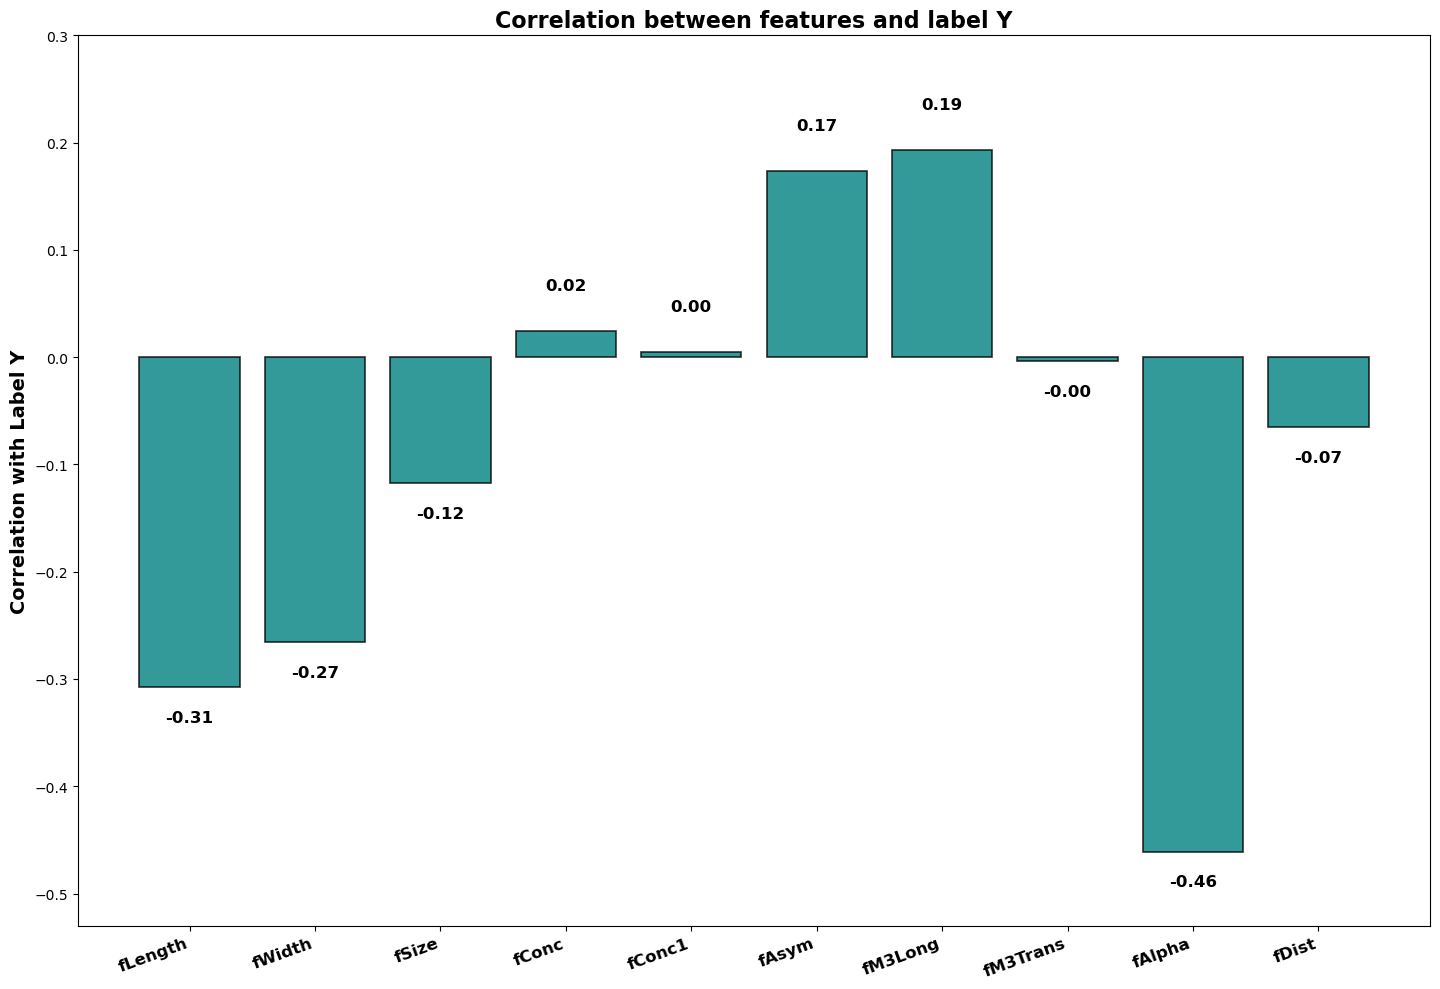

In [13]:
# Calculate the correlation between each feature and the label Y

Y = np.where(Y == 'g', 1, -1)
Y = np.array(Y) 
feature_names = data.columns[:10]

correlations = np.zeros(X_rescaled.shape[1])  
for i in range(X_rescaled.shape[1]):
    feature = X_rescaled.iloc[:, i]  
    correlations[i] = np.corrcoef(feature, Y)[0, 1]

# create a bar plot to display the correlations
fig, ax = plt.subplots(figsize=(14.5, 10))

bars = ax.bar(feature_names, correlations, color='teal', edgecolor='black', linewidth=1.2,alpha=0.8)

# add correlation values on top of each bar
for i, corr in enumerate(correlations):
    ax.text(i, corr + 0.035 if corr>=0 else corr-0.035, f'{corr:.2f}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

ax.set_ylabel('Correlation with Label Y', fontsize=14, fontweight='bold')
ax.set_ylim(-0.53,0.3)
ax.set_title('Correlation between features and label Y', fontsize=16, fontweight='bold')
ax.set_xticks(np.arange(len(feature_names)))
ax.set_xticklabels(feature_names, fontsize=12, fontweight='bold', rotation=20, ha='right')
plt.tight_layout()
plt.show()

The features most strongly correlated with the label Y, and thus most informative for distinguishing between gamma and hadron events, are $Alpha$, $Length$ and $Width$. This is coherent with our observations from the feature histograms, where these features exhibit more distinct distributions between the two classes.

# punto 3 (Samu)

In this section we analyze the distributions of the "fWidth" and "fLength" parameters. First of all we have computed the mean and standard deviation for both samples and we rescaled them.
Then the distribution of both "fWidth" and "fLength" was plotted dividing the gamma from the hadron events.

We then used the "fSize" parameter to apply a cut to both the signals (gamma) and background (hadron) events and considered only the tails of their distribution. Since "fSize" is proportional to the number of photons, for both the width and lenght distribution we defined as "High energy events" the data points higher than $\mu + \sigma$ (right-side tail) and as "Low energy events" the data points lower than $\mu - \sigma$. Considering $\mu$ and $\sigma$ rispectively as the mean and standard deviation of the rescaled width and lenght distributions.
From this comparison we can clearly see that in the high energy tail the signal is more clustered and separated from the background, despite having a smaller number of gamma events in this energy region. Meanwhile in the low energy tail signal and background events are more evenly distributed.

Therefore, cutting the data considering only the high energy region could give us an edge while classifying the events 



In [4]:
## find mean and std of the original data

mu_l=data['fLength'].mean()
std_l=data['fLength'].std()
mu_w=data['fWidth'].mean()
std_w=data['fWidth'].std()
print('Length attribute:   mean = ', mu_l, '    std = ', std_l)
print('Width attribute:    mean = ', mu_w, '   std = ', std_w)


Length attribute:   mean =  53.25143966559756     std =  42.3655976356796
Width attribute:    mean =  22.181291098375308    std =  18.34648391015197


In [5]:
data['scaled_fLength']= (data['fLength']-mu_l)/std_l   ##add a scaled comlumn to the DataFrame
data['scaled_fWidth']= (data['fWidth']-mu_w)/std_w  

(-1.5, 8.0)

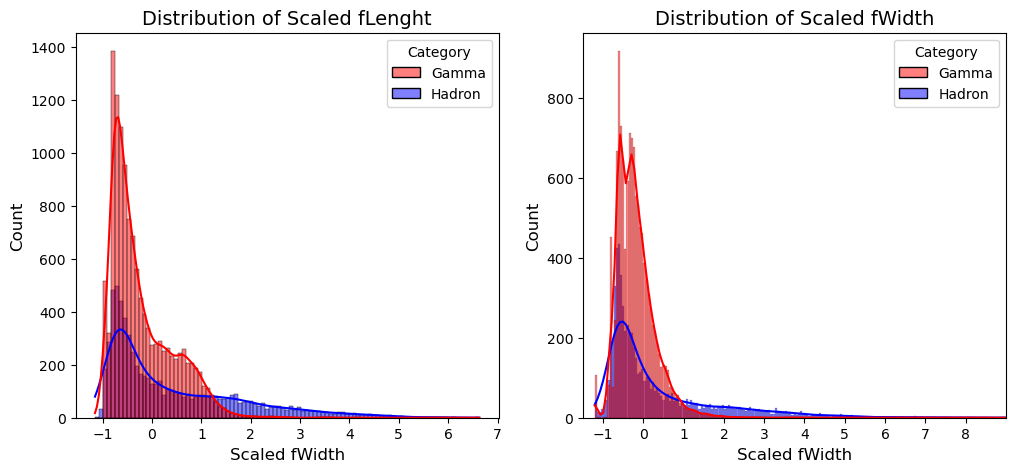

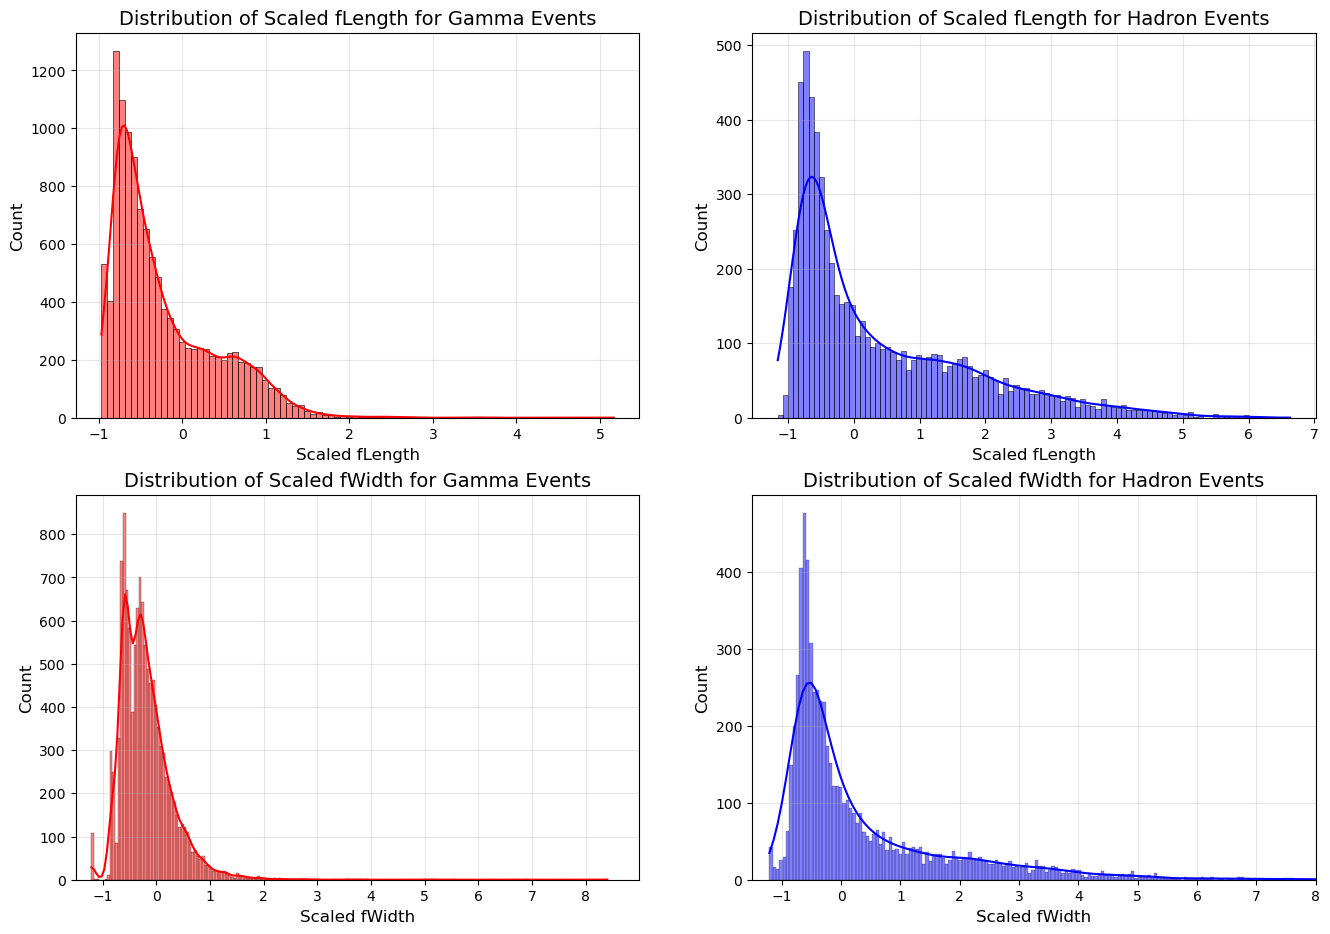

In [143]:
##########   comparison
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(data,x=data['scaled_fLength'],hue='category', kde=True, color='blue', ax=ax[0], palette=['red','blue'],edgecolor='black')
ax[0].set_title("Distribution of Scaled fLenght", fontsize=14)
ax[0].set_xlabel("Scaled fWidth", fontsize=12)
ax[0].set_ylabel("Count", fontsize=12)
legend = ax[0].get_legend()
handles = legend.legend_handles
ax[0].legend(handles, ['Gamma', 'Hadron'], title='Category')


sns.histplot(data,x=data['scaled_fWidth'],hue='category', kde=True, color='blue', ax=ax[1], palette=['red','blue'],edgecolor='black')
ax[1].set_title("Distribution of Scaled fWidth", fontsize=14)
ax[1].set_xlabel("Scaled fWidth", fontsize=12)
ax[1].set_ylabel("Count", fontsize=12)
ax[1].set_xticks(range(-1,9))
ax[1].set_xlim(-1.5, 9)  
legend = ax[1].get_legend()
handles = legend.legend_handles
ax[1].legend(handles, ['Gamma', 'Hadron'], title='Category')




#####################3
fig1, ax1 = plt.subplots(2, 2, figsize=(16, 11))

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'], kde=True, color='red', ax=ax1[0][0])
ax1[0][0].set_title("Distribution of Scaled fLength for Gamma Events", fontsize=14)
ax1[0][0].set_xlabel("Scaled fLength", fontsize=12)
ax1[0][0].set_ylabel("Count", fontsize=12)
ax1[0][0].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'], kde=True, color='red', ax=ax1[1][0])
ax1[1][0].set_title("Distribution of Scaled fWidth for Gamma Events", fontsize=14)
ax1[1][0].set_xlabel("Scaled fWidth", fontsize=12)
ax1[1][0].set_ylabel("Count", fontsize=12)
ax1[1][0].grid(True, alpha=0.3)
ax1[1][0].set_xticks(range(-1,9))
ax1[1][0].set_xlim(-1.5, 9) 

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'], kde=True, color='blue', ax=ax1[0][1], bins=100)
ax1[0][1].set_title("Distribution of Scaled fLength for Hadron Events", fontsize=14)
ax1[0][1].set_xlabel("Scaled fLength", fontsize=12)
ax1[0][1].set_ylabel("Count", fontsize=12)
ax1[0][1].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'], kde=True, color='blue', ax=ax1[1][1], bins=250)
ax1[1][1].set_title("Distribution of Scaled fWidth for Hadron Events", fontsize=14)
ax1[1][1].set_xlabel("Scaled fWidth", fontsize=12)
ax1[1][1].set_ylabel("Count", fontsize=12)
ax1[1][1].grid(True, alpha=0.3)
ax1[1][1].set_xticks(range(-1,9))
ax1[1][1].set_xlim(-1.5, 8)  




In [7]:
median_fSize = data['fSize'].median()
min_fSize = data['fSize'].min()
max_fSize = data['fSize'].max()
mean_fSize = data['fSize'].mean()
std_fSize = data['fSize'].std()
print("Statistichal informations of fSize: \nmedian=",median_fSize, '\nmin=', min_fSize, '\nmax=', max_fSize, '\nmean=', mean_fSize, '\nstd=', std_fSize)

Statistichal informations of fSize: 
median= 2.7396 
min= 1.9413 
max= 5.3233 
mean= 2.8250264314632734 
std= 0.4726092687403626


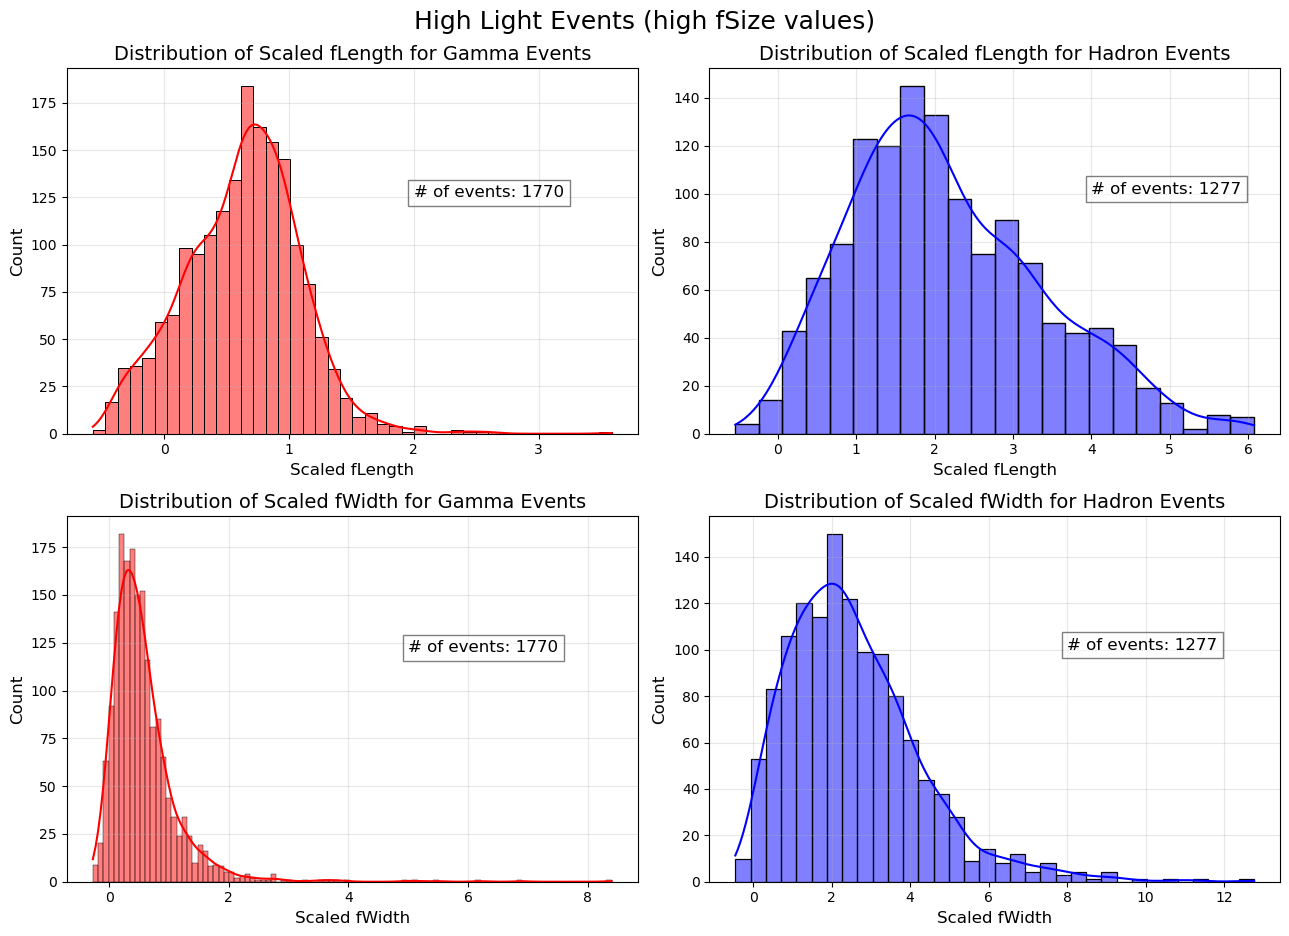

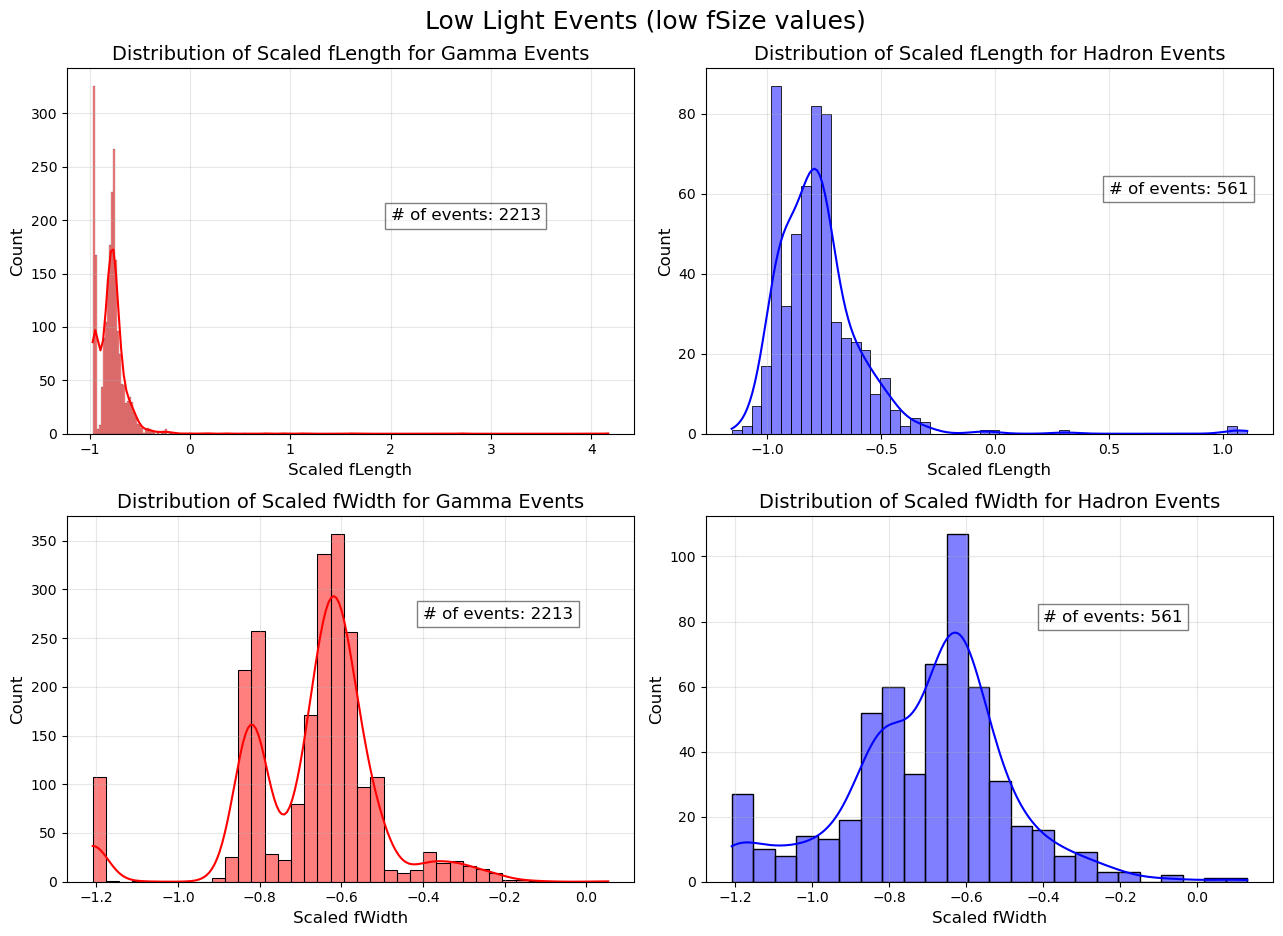

In [8]:
####high light events
fig, ax = plt.subplots(2, 2, figsize=(13, 9.5))
fig.suptitle('High Light Events (high fSize values)', fontsize=18)

##plot of length - g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] >= mean_fSize+std_fSize], kde=True, color='red', ax=ax[0][0])
ax[0][0].set_title("Distribution of Scaled fLength for Gamma Events", fontsize=14)
ax[0][0].set_xlabel("Scaled fLength", fontsize=12)
ax[0][0].set_ylabel("Count", fontsize=12)
ax[0][0].grid(True, alpha=0.3)
ng_length_high=len(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] >= mean_fSize+std_fSize])
ax[0][0].text(x=2,y=125,s=f"# of events: {ng_length_high}", fontsize=12, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

##plot of lenght - h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] >= mean_fSize+std_fSize], kde=True, color='blue', ax=ax[0][1])
ax[0][1].set_title("Distribution of Scaled fLength for Hadron Events", fontsize=14)
ax[0][1].set_xlabel("Scaled fLength", fontsize=12)
ax[0][1].set_ylabel("Count", fontsize=12)
ax[0][1].grid(True, alpha=0.3)
nh_length_high=len(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] >= mean_fSize+std_fSize])
ax[0][1].text(x=4,y=100,s=f"# of events: {nh_length_high}", fontsize=12, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

##plot of width - g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] >= mean_fSize+std_fSize], kde=True, color='Red', ax=ax[1][0])
ax[1][0].set_title("Distribution of Scaled fWidth for Gamma Events", fontsize=14)
ax[1][0].set_xlabel("Scaled fWidth", fontsize=12)
ax[1][0].set_ylabel("Count", fontsize=12)
ax[1][0].grid(True, alpha=0.3)
ng_width_high=len(data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] >= mean_fSize+std_fSize])
ax[1][0].text(x=5,y=120,s=f"# of events: {ng_width_high}", fontsize=12, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

##plot of width - h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] >= mean_fSize+std_fSize], kde=True, color='blue', ax=ax[1][1])
ax[1][1].set_title("Distribution of Scaled fWidth for Hadron Events", fontsize=14)
ax[1][1].set_xlabel("Scaled fWidth", fontsize=12)
ax[1][1].set_ylabel("Count", fontsize=12)
ax[1][1].grid(True, alpha=0.3)
nh_width_high=len(data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] >= mean_fSize+std_fSize])
ax[1][1].text(x=8,y=100,s=f"# of events: {nh_width_high}", fontsize=12, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.tight_layout()
plt.show()

#### low light events
fig1, ax1 = plt.subplots(2, 2, figsize=(13, 9.5))
fig1.suptitle('Low Light Events (low fSize values)', fontsize=18)

##plot of lenght - g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] <= mean_fSize-std_fSize], kde=True, color='red', ax=ax1[0][0])
ax1[0][0].set_title("Distribution of Scaled fLength for Gamma Events", fontsize=14)
ax1[0][0].set_xlabel("Scaled fLength", fontsize=12)
ax1[0][0].set_ylabel("Count", fontsize=12)
ax1[0][0].grid(True, alpha=0.3)
ng_low=len(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] <= mean_fSize-std_fSize])
ax1[0][0].text(x=2,y=200,s=f"# of events: {ng_low}", fontsize=12, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))


##plot of lenght - h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] <= mean_fSize-std_fSize], kde=True, color='blue', ax=ax1[0][1])
ax1[0][1].set_title("Distribution of Scaled fLength for Hadron Events", fontsize=14)
ax1[0][1].set_xlabel("Scaled fLength", fontsize=12)
ax1[0][1].set_ylabel("Count", fontsize=12)
ax1[0][1].grid(True, alpha=0.3)
nh_low=len(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] <= mean_fSize-std_fSize])
ax1[0][1].text(x=0.5,y=60,s=f"# of events: {nh_low}", fontsize=12, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))


##plot of width - g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] <= mean_fSize-std_fSize], kde=True, color='Red', ax=ax1[1][0])
ax1[1][0].set_title("Distribution of Scaled fWidth for Gamma Events", fontsize=14)
ax1[1][0].set_xlabel("Scaled fWidth", fontsize=12)
ax1[1][0].set_ylabel("Count", fontsize=12)
ax1[1][0].grid(True, alpha=0.3)
ax1[1][0].text(x=-0.4,y=270,s=f"# of events: {ng_low}", fontsize=12, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

##plot of width - h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] <= mean_fSize-std_fSize], kde=True, color='blue', ax=ax1[1][1])
ax1[1][1].set_title("Distribution of Scaled fWidth for Hadron Events", fontsize=14)
ax1[1][1].set_xlabel("Scaled fWidth", fontsize=12)
ax1[1][1].set_ylabel("Count", fontsize=12)
ax1[1][1].grid(True, alpha=0.3)
ax1[1][1].text(x=-0.4,y=80,s=f"# of events: {nh_low}", fontsize=12, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))
plt.tight_layout()
plt.show()



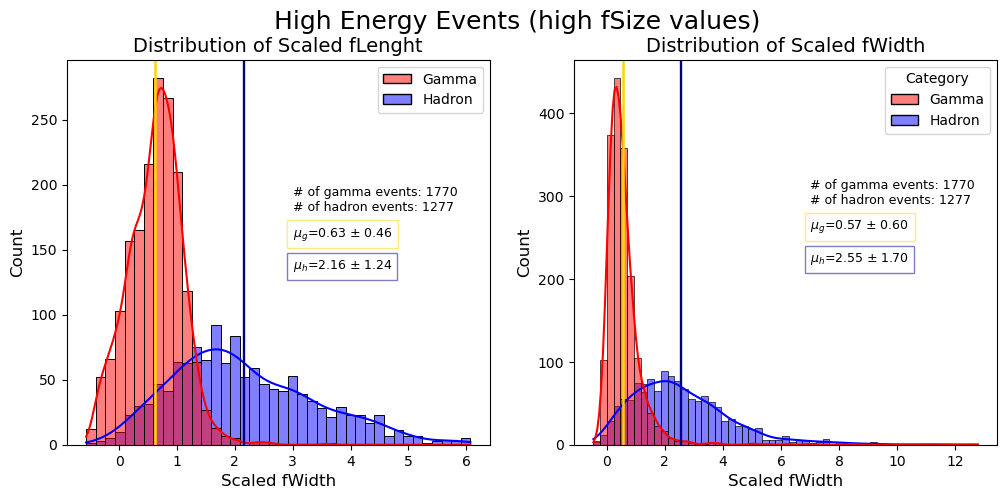

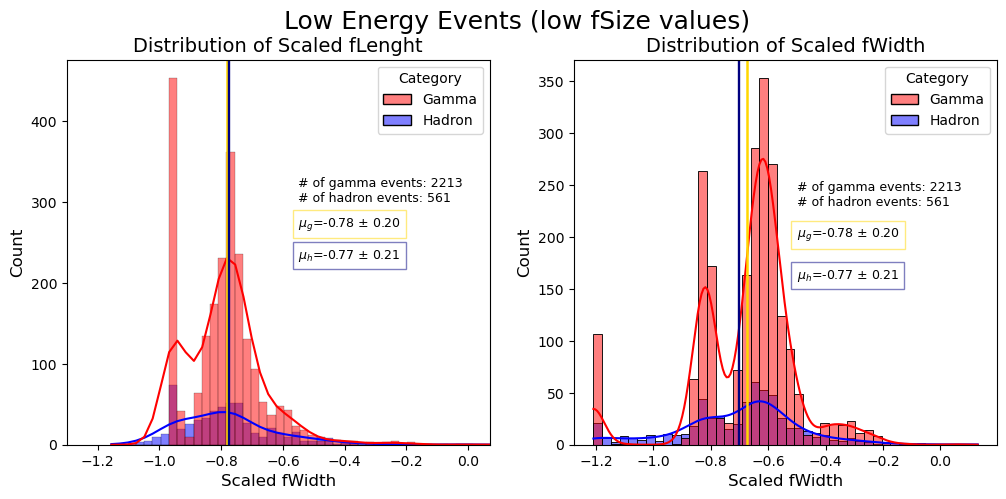

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('High Energy Events (high fSize values)', fontsize=18)

ng_high=len(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] >= mean_fSize+std_fSize])
nh_high=len(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] >= mean_fSize+std_fSize])
l_mu_g_high=data[data['category'] == 'g']['scaled_fLength'][data['fSize'] >= mean_fSize+std_fSize].mean()
l_mu_h_high=data[data['category'] == 'h']['scaled_fLength'][data['fSize'] >= mean_fSize+std_fSize].mean()
l_std_g_high=data[data['category'] == 'g']['scaled_fLength'][data['fSize'] >= mean_fSize+std_fSize].std()
l_std_h_high=data[data['category'] == 'h']['scaled_fLength'][data['fSize'] >= mean_fSize+std_fSize].std()
w_mu_g_high=data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] >= mean_fSize+std_fSize].mean()
w_mu_h_high=data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] >= mean_fSize+std_fSize].mean()
w_std_g_high=data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] >= mean_fSize+std_fSize].std()
w_std_h_high=data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] >= mean_fSize+std_fSize].std()

sns.histplot(data,x=data['scaled_fLength'][data['fSize'] >= mean_fSize+std_fSize],hue='category', kde=True, color='blue', ax=ax[0], palette=['red','blue'],edgecolor='black')
ax[0].set_title("Distribution of Scaled fLenght", fontsize=14)
ax[0].set_xlabel("Scaled fWidth", fontsize=12)
ax[0].set_ylabel("Count", fontsize=12)
ax[0].axvline(l_mu_g_high,c='gold', label= r'$\mu_{g}$', lw=1.8)
ax[0].axvline(l_mu_h_high,c='navy',label=r'$\mu_{h}$', lw=1.7)
legend = ax[0].get_legend()
handles = legend.legend_handles
ax[0].legend(handles, ['Gamma', 'Hadron'])
ax[0].text(x=3,y=180,s=f"# of gamma events: {ng_high} \n# of hadron events: {nh_high}", fontsize=9, color='black')
ax[0].text(x=3,y=160,s=fr"$\mu_{{g}}$={l_mu_g_high:.2f} $\pm$ {l_std_g_high:.2f}", fontsize=9, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='gold'))
ax[0].text(x=3,y=135,s=fr"$\mu_{{h}}$={l_mu_h_high:.2f} $\pm$ {l_std_h_high:.2f}", fontsize=9, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='navy'))

sns.histplot(data,x=data['scaled_fWidth'][data['fSize'] >= mean_fSize+std_fSize],hue='category', kde=True, color='blue', ax=ax[1], palette=['red','blue'],edgecolor='black')
ax[1].set_title("Distribution of Scaled fWidth", fontsize=14)
ax[1].set_xlabel("Scaled fWidth", fontsize=12)
ax[1].set_ylabel("Count", fontsize=12)
ax[1].axvline(w_mu_g_high,c='gold', label= r'$\mu_{g}$', lw=1.8)
ax[1].axvline(w_mu_h_high,c='navy',label=r'$\mu_{h}$', lw=1.7)
legend = ax[1].get_legend()
handles = legend.legend_handles
ax[1].legend(handles, ['Gamma', 'Hadron', r'$\mu_{g}$', r'$\mu_{h}$'], title='Category')
ax[1].text(x=7,y=290,s=f"# of gamma events: {ng_high} \n# of hadron events: {nh_high}", fontsize=9, color='black')
ax[1].text(x=7,y=260,s=fr"$\mu_{{g}}$={w_mu_g_high:.2f} $\pm$ {w_std_g_high:.2f}", fontsize=9, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='gold'))
ax[1].text(x=7,y=220,s=fr"$\mu_{{h}}$={w_mu_h_high:.2f} $\pm$ {w_std_h_high:.2f}", fontsize=9, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='navy'))


fig1, ax1 = plt.subplots(1, 2, figsize=(12,5))
fig1.suptitle('Low Energy Events (low fSize values)', fontsize=18)

ng_low=len(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] <= mean_fSize-std_fSize])
nh_low=len(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] <= mean_fSize-std_fSize])
l_mu_g_low=data[data['category'] == 'g']['scaled_fLength'][data['fSize'] <= mean_fSize-std_fSize].mean()
l_mu_h_low=data[data['category'] == 'h']['scaled_fLength'][data['fSize'] <= mean_fSize-std_fSize].mean()
l_std_g_low=data[data['category'] == 'g']['scaled_fLength'][data['fSize'] <= mean_fSize-std_fSize].std()
l_std_h_low=data[data['category'] == 'h']['scaled_fLength'][data['fSize'] <= mean_fSize-std_fSize].std()
w_mu_g_low=data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] <= mean_fSize-std_fSize].mean()
w_mu_h_low=data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] <= mean_fSize-std_fSize].mean()
w_std_g_low=data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] <= mean_fSize-std_fSize].std()
w_std_h_low=data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] <= mean_fSize-std_fSize].std()


sns.histplot(data,x=data['scaled_fLength'][data['fSize'] <= mean_fSize-std_fSize],hue='category', kde=True, color='blue', ax=ax1[0], palette=['red','blue'],edgecolor='black', bins=200)
ax1[0].set_title("Distribution of Scaled fLenght", fontsize=14)
ax1[0].set_xlabel("Scaled fWidth", fontsize=12)
ax1[0].set_ylabel("Count", fontsize=12)
ax1[0].axvline(l_mu_g_low,c='gold', label= r'$\mu_{g}$', lw=1.8)
ax1[0].axvline(l_mu_h_low,c='navy',label=r'$\mu_{h}$', lw=1.7)
legend = ax[0].get_legend()
handles = legend.legend_handles
ax1[0].legend(handles, ['Gamma', 'Hadron'], title='Category')
ax1[0].set_xlim(-1.3,0.07)
ax1[0].text(x=-0.55,y=300,s=f"# of gamma events: {ng_low} \n# of hadron events: {nh_low} ", fontsize=9, color='black')
ax1[0].text(x=-0.55,y=270,s=fr"$\mu_{{g}}$={l_mu_g_low:.2f} $\pm$ {l_std_g_low:.2f}", fontsize=9, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='gold'))
ax1[0].text(x=-0.55,y=230,s=fr"$\mu_{{h}}$={l_mu_h_low:.2f} $\pm$ {l_std_h_low:.2f}", fontsize=9, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='navy'))


sns.histplot(data,x=data['scaled_fWidth'][data['fSize'] <= mean_fSize-std_fSize],hue='category', kde=True, color='blue', ax=ax1[1], palette=['red','blue'],edgecolor='black')
ax1[1].set_title("Distribution of Scaled fWidth", fontsize=14)
ax1[1].set_xlabel("Scaled fWidth", fontsize=12)
ax1[1].set_ylabel("Count", fontsize=12)
ax1[1].axvline(w_mu_g_low,c='gold', label= r'$\mu_{g}$', lw=1.8)
ax1[1].axvline(w_mu_h_low,c='navy',label=r'$\mu_{h}$', lw=1.7)
legend = ax[1].get_legend()
handles = legend.legend_handles
ax1[1].legend(handles, ['Gamma', 'Hadron'], title='Category')
ax1[1].text(x=-0.5,y=230,s=f"# of gamma events: {ng_low} \n# of hadron events: {nh_low}", fontsize=9, color='black')
ax1[1].text(x=-0.5,y=200,s=fr"$\mu_{{g}}$={l_mu_g_low:.2f} $\pm$ {l_std_g_low:.2f}", fontsize=9, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='gold'))
ax1[1].text(x=-0.5,y=160,s=fr"$\mu_{{h}}$={l_mu_h_low:.2f} $\pm$ {l_std_h_low:.2f}", fontsize=9, color='black',  bbox=dict(facecolor='white', alpha=0.5, edgecolor='navy'))


plt.show()

# punto 4 (Johnny)
Perform a Principal Component Analysis on that dataset for the signal and the background events

# punto 5 (LukeBroc)
Perform a multivariate analysis, without using the parameter fAlpha for the classification, with the technique you prefer and evaluate its performance (e.g. in terms of Area Under the (ROC) Curve).

# 5.1 PERCEPTRON

In [ ]:
new_Y = []

# gammas are +1    hadrons are -1

for i in range(len(Y)):
    if (Y.iloc[i] == 'g'):
        new_Y.append(1)
    if(Y.iloc[i] == 'h'):
        new_Y.append(-1)
        
Y_df = pd.DataFrame({'category' : new_Y})
data_rescaled_and_indexed = pd.merge(X_rescaled, Y_df,left_index=True, right_index=True)

# data_rescaled_and_indexed contains all features rescaled with avg = 0 and std = 1, and gammas = 1 and hadrons = -1


## Some ML functions

In [5]:
# this function divides the dataset in input in parts_to_be_split parts. One of them is returned as test_set
# the other ones are the training_set. Indexes of the chosen data can be accessed (test_indexes, train_indexes)
# (for example in a K-fold)

def split_train_test_set(data,parts_to_be_split):
    indexes = np.arange(0,data.shape[0],1)
    rnd.shuffle(indexes)
    len_test_set = int(len(indexes) / parts_to_be_split)

    test_indexes = indexes[:len_test_set]
    train_indexes = indexes[len_test_set:]

    train_set = data.iloc[train_indexes]
    test_set = data.iloc[test_indexes]
    
    return train_set, test_set

# this function takes col category and returns as Y (target), the other columns are X (labels)
def split_X_Y(data):
    Y = data['category']
    X = data.drop('category',axis=1)

    return X,Y

Getting the right sets

In [ ]:
# divide dataset in 5 parts, taking 1 as test set ( 20 % )
# remove alpha



parts_to_be_split = 5 
train_set, test_set = split_train_test_set( data_rescaled_and_indexed , parts_to_be_split )
train_set = train_set.drop('fAlpha',axis=1)
test_set = test_set.drop('fAlpha',axis=1)
X_train, Y_train = split_X_Y(train_set)
X_test, Y_test = split_X_Y(test_set)

print(np.shape(X_train),np.shape(Y_train))
print(np.shape(X_test),np.shape(Y_test))


coding the perceptron

In [16]:
def count_errors(X_train,Y_train,current_w):
    prediction = np.sign(np.dot(current_w,X_train.T))
    indexes = []
    errors = 0
    for i in range(len(prediction)):
        if(prediction[i] != Y_train.iloc[i]):
            indexes.append(i)
            errors += 1
            
    if (errors == 0):
        return 0, -1
    
    return errors, indexes

def random_perceptron_update(X_train,Y_train,current_w):
    
    errors, indexes = count_errors(X_train,Y_train,current_w)
    rnd.shuffle(indexes)
    idx = indexes[0]
    
    if (errors != 0):
        new_w = current_w + Y_train.iloc[idx] * X_train.iloc[idx]
        
    return new_w

def evaluate_misclassification(X_train,Y_train,current_w):
    prediction = np.sign(np.dot(current_w,X_train.T))
    g_miss = 0
    h_miss = 0
    
    for i in range(len(prediction)):
        if(prediction[i] == 1 and Y_train.iloc[i] == -1):
            h_miss += 1
        if(prediction[i] == -1 and Y_train.iloc[i] == 1):
            g_miss += 1
            
    return g_miss,h_miss

def evaluate_test_set(X_test,Y_test,current_w):
    prediction = np.sign(np.dot(current_w,X_test.T))
    g_miss = 0
    h_miss = 0
    
    for i in range(len(prediction)):
        if(prediction[i] == 1 and Y_test.iloc[i] == -1):
            h_miss += 1
        if(prediction[i] == -1 and Y_test.iloc[i] == 1):
            g_miss += 1

    return g_miss,h_miss

def randomized_perceptron(X_train, Y_train, X_test, Y_test, max_iter):
    current_w = np.zeros(len(X_train.columns))
    new_w = current_w.copy()
    best_w = current_w.copy()
    best_errors, _ = count_errors(X_train,Y_train,current_w)
    iteration = 0
    
    g_miss_tot = []
    h_miss_tot = []
    gt_miss_tot = []
    ht_miss_tot = []
    all_w = []
    
    while (best_errors > 0 and iteration < max_iter):
        iteration += 1
        new_w = random_perceptron_update(X_train,Y_train,new_w)
        errors, _ = count_errors(X_train,Y_train,new_w)
        
        if (errors < best_errors):
            best_errors = errors
            best_w = new_w
        
        g_miss, h_miss = evaluate_misclassification(X_train,Y_train,new_w)
        tg_miss, th_miss = evaluate_test_set(X_test,Y_test,new_w)
        g_miss_tot.append(g_miss)
        h_miss_tot.append(h_miss)
        gt_miss_tot.append(tg_miss)
        ht_miss_tot.append(th_miss)
        all_w.append(new_w)
        
    return best_w, all_w, best_errors, g_miss_tot, h_miss_tot, gt_miss_tot, ht_miss_tot

In [ ]:
max_iter = 1000

best_w, all_w, best_errors, g_misses, h_misses, test_g_misses, test_h_misses = randomized_perceptron(X_train, Y_train,X_test,Y_test,max_iter)


In [ ]:
tot_g = len(Y_train[Y_train == 1])
tot_h = len(Y_train[Y_train == -1])
tot_g_test = len(Y_test[Y_test == 1])
tot_h_test = len(Y_test[Y_test == -1])
ROC_X = np.zeros(len(g_misses))
ROC_Y = np.zeros(len(g_misses))
ROC_X_test = np.zeros(len(test_g_misses))
ROC_Y_test = np.zeros(len(test_g_misses))

for i in range(len(g_misses)):
    ROC_Y[i] = ((tot_g - g_misses[i]) / tot_g)
    ROC_X[i] = (h_misses[i] / tot_h)
    ROC_Y_test[i] = ((tot_g_test - test_g_misses[i]) / tot_g_test)
    ROC_X_test[i] = (test_h_misses[i] / tot_h_test)

a = np.linspace(0,1,100)
plt.scatter(ROC_X,ROC_Y,color='blue',label='perceptron points',s=5)
plt.scatter(ROC_X_test,ROC_Y_test,color='green',label='perceptron points',s=5)
plt.plot(a,a,color='red')
plt.legend()
plt.show()

In [ ]:
distances = np.zeros(len(ROC_X_test))

for i in range(len(distances)):
    distances[i] = np.sqrt(ROC_X_test[i]**2 + (1-ROC_Y_test[i])**2)

best_index = np.argmin(distances)
best_w = all_w[best_index]

file_name="magic04.data"
data = pd.DataFrame(pd.read_csv(file_name))
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']

averages = []
stds = []

for i in range(len(best_w)):
    averages.append(np.average(data[data.columns[i]]))
    stds.append(np.std(data[data.columns[i]]))
    
best_w_rescaled = best_w * stds + averages
print('best W for perceptron and rescaled is:')
print(best_w_rescaled)

In [ ]:
data = list(zip(ROC_X, ROC_Y))

N_points = 200
point_range = 1 / N_points

# Sort the data based on ROC_X, then select the maximum ROC_Y for each unique ROC_X
sorted_data = sorted(data, key=lambda x: x[0])  # Sort by ROC_X
unique_x = []
unique_y = []

# Keep track of the maximum ROC_Y for each unique ROC_X
current_x = sorted_data[0][0]
max_y = sorted_data[0][1]

for x, y in sorted_data:
    if x > current_x - point_range and x < current_x + point_range:
        max_y = max(max_y, y)  # Update max_y if y is higher
    else:
        unique_x.append(current_x)
        unique_y.append(max_y)
        current_x = x
        max_y = y

# Append the last pair
unique_x.append(current_x)
unique_y.append(max_y)

# Plot the results
a = np.linspace(0, 1, 100)
plt.scatter(unique_x, unique_y, color='blue', label='perceptron points', s=5)
plt.plot(a, a, color='red')  # Plot the "no skill" line
plt.legend()
plt.show()

print(len(unique_x))
print(len(ROC_X))

# Random Forest (LBroc)

I am going to implement a random forest for data classification, performing a control on the test set, not using the alpha parameter

import dataset, remove fAlpha and set category to 1 for gamma and -1 for hadron

In [7]:
import random

file_name="magic_data.dat"
data = pd.DataFrame(pd.read_csv(file_name))
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']

data = data.drop('fAlpha',axis=1)
cat = np.zeros(data.shape[0])
for i in range(data.shape[0]):
    if (data['category'].iloc[i] == 'g'):
        cat[i] = 1
    if (data['category'].iloc[i] == 'h'):
        cat[i] = -1
data['category'] = cat
print(np.shape(data))
parts_to_be_split = 5

train_set, test_set = split_train_test_set(data,parts_to_be_split)


X_train, Y_train = split_X_Y(train_set)
X_test, Y_test = split_X_Y(test_set)

(19019, 10)
(15216, 10)
(3803, 10)


 ## making decision tree
 Making up the class Tree

In [6]:
class Tree:

    def __init__(self):
        self.idx = -1    # The index of the feature over which you split (no split: -1)
        self.thresh = 0  # The threshold value over which you split (<=: left, >: right)
        self.leaf = 0    # 1 if it is a leaf of class 1, -1 if it is a leaf of class -1, 0 if it is an internal node
        self.left = []   # Left subtree (empty if it is a leaf)
        self.right = []  # Right subtree (empty if it is a leaf)


    def entropy(left, right):
        H = 0
        tot_length = len(left) + len(right)
        left_prob = len(np.where(left > 0)[0]) / len(left)
        if (left_prob > 0):
            H -= len(left) * left_prob * np.log2(left_prob) / tot_length
        if (left_prob < 1):
            H -= len(left) * (1 - left_prob) * np.log2(1 - left_prob) / tot_length
        right_prob = len(np.where(right > 0)[0]) / len(right)
        if (right_prob > 0):
            H -= len(right) * right_prob * np.log2(right_prob) / tot_length
        if (right_prob < 1):
            H -= len(right) * (1 - right_prob) * np.log2(1 - right_prob) / tot_length
        return H

    def classify(self, x):
        # Classify the point x (easy for leaves, you have to go down the tree if the node is internal)
        if self.leaf == 0:
            if x[self.idx] > self.thresh:
                return self.right.classify(x)
            else:
                return self.left.classify(x)         
        else:
            return self.leaf

    def id3_training(self, X, Y, max_depth, printing):
        # Check if the node is a leaf (all nodes have the same label)
        if (np.max(Y) - np.min(Y) < 1e-3):
            self.leaf = np.max(Y)
            if (printing):
                print('Remaining depth: ' + str(max_depth) + ', leaf node (all labels are the same over ' + str(len(Y)) + ' points)')
            return
        # If the maximum depth is 0, the node must be a leaf!
        if (max_depth < 1):
            if (printing):
                print('Remaining depth: ' + str(max_depth) + ', leaf node (maximum depth reached, ' + str(len(Y)) + ' points)')
            if (len(np.where(Y > 0)) > len(Y) / 2):
                self.leaf = 1
            else:
                self.leaf = -1
            return
        # Find the best split: iterate over features
        best_idx = -1
        best_thresh = -1
        best_entropy = 1e9
        # Iterate over the features and threshold values
        for idx in range(X.shape[1]):
            values = X[:,idx]
            sorted_idx = np.argsort(values)
            values = np.unique(values) #values = np.unique(values[sorted_idx])
            for j in range(len(values)-1):
                thresh = (values[j]+values[j+1])/2
                left = np.where(X[:,idx] < thresh)
                right = np.where(X[:,idx] >= thresh)
                if len(left) == 0 or len(right) == 0:
                    print('error',thresh,idx)
                H = Tree.entropy(Y[left],Y[right])
                if H < best_entropy:
                    best_entropy = H
                    best_idx = idx
                    best_thresh = thresh
        
        
        if (best_idx == -1):
            # No valid features! The points are all identical
            self.leaf = np.sign(np.sum(Y))
            if (self.leaf == 0):
                self.leaf = 1
            if (printing):
                print('Remaining depth: ' + str(max_depth) + ', leaf node (all inputs are the same over ' + str(len(Y)) + ' points)')
            return
        left_samples = np.where(X[:, best_idx] <= best_thresh)[0]
        right_samples = np.where(X[:, best_idx] > best_thresh)[0]
        if (printing):
            print('Remaining depth: ' + str(max_depth) + ', splitting ' + str(len(Y)) + ' elements into ' + str(len(left_samples)) + ' and ' + str(len(right_samples)) + ' over feature ' + str(best_idx))

        #Run the next recursive step of ID3 over the left and right subtrees       
        self.idx = best_idx
        self.thresh = best_thresh
        self.left = Tree()
        self.right = Tree()
        self.left.id3_training(X[left_samples,:],Y[left_samples],max_depth - 1,printing)
        self.right.id3_training(X[right_samples,:],Y[right_samples],max_depth-1,printing)


    def extra_training(self, X, Y, max_depth, printing):
        # Check if the node is a leaf (all nodes have the same label)
        if (np.max(Y) - np.min(Y) < 1e-3):
            self.leaf = np.max(Y)
            if (printing):
                print('Remaining depth: ' + str(max_depth) + ', leaf node (all labels are the same over ' + str(len(Y)) + ' points)')
            return
        # If the maximum depth is 0, the node must be a leaf
        if (max_depth < 1):
            if (printing):
                print('Remaining depth: ' + str(max_depth) + ', leaf node (maximum depth reached, ' + str(len(Y)) + ' points)')
            if (len(np.where(Y > 0)) > len(Y) / 2):
                self.leaf = 1
            else:
                self.leaf = -1
            return
        # Find the best split: iterate over features
        best_idx = -1
        best_thresh = -1
        best_entropy = 1e9
        # Iterate over the features (now the threshold value is random) 
        for idx in range(X.shape[1]):
            values = X[:,idx]
            sorted_idx = np.argsort(values)
            values = np.unique(values)
            
            for j in range(len(values)):
                thresh = rnd.uniform(1)
                thresh = (max(values) - min(values)) * thresh
                left = np.where(X[:,idx] < thresh)
                right = np.where(X[:,idx] >= thresh)
                if (len(left) == 0 or len(right) == 0):
                    print('error',thresh,idx)
                H = Tree.entropy(Y[left],Y[right])
                
                if H < best_entropy:
                    best_entropy = H
                    best_idx = idx
                    best_thresh = thresh
        
        if (best_idx == -1):
            # No valid features! The points are all identical
            self.leaf = np.sign(np.sum(Y))
            if (self.leaf == 0):
                self.leaf = 1
            if (printing):
                print('Remaining depth: ' + str(max_depth) + ', leaf node (all inputs are the same over ' + str(len(Y)) + ' points)')
            return
        left_samples = np.where(X[:, best_idx] <= best_thresh)[0]
        right_samples = np.where(X[:, best_idx] > best_thresh)[0]
        if (printing):
            print('Remaining depth: ' + str(max_depth) + ', splitting ' + str(len(Y)) + ' elements into ' + str(len(left_samples)) + ' and ' + str(len(right_samples)) + ' over feature ' + str(best_idx))
        
        # run the next recursive step of ID3 over the left and right subtrees
        self.idx = best_idx
        self.thresh = best_thresh
        self.left = Tree()
        self.right = Tree()
        self.left.extra_training(X[left_samples,:],Y[left_samples],max_depth-1,printing)
        self.right.extra_training(X[right_samples,:],Y[right_samples],max_depth-1,printing)

Now we use the tree class to learn a model

In [9]:
X_train_np = np.array(X_train)
Y_train_np = np.array(Y_train)
X_test_np = np.array(X_test)
Y_test_np = np.array(Y_test)

In [30]:
single_tree = Tree()
single_tree.id3_training(X_train_np, Y_train_np, 25, True)

train_loss = 0
for i in range(len(Y_train_np)):
    predicted = single_tree.classify(X_train_np[i, :])
    if (Y_train_np[i] != predicted):
        train_loss += 1 / len(Y_train_np)
print('Training loss: ' + str(train_loss))

test_loss = 0
for i in range(len(Y_test_np)):
    predicted = single_tree.classify(X_test_np[i, :])
    if (Y_test_np[i] != predicted):
        test_loss += 1 / len(Y_test_np)
print('Test loss: ' + str(test_loss))

Remaining depth: 25, splitting 15216 elements into 13964 and 1252 over feature 0
Remaining depth: 24, splitting 13964 elements into 708 and 13256 over feature 6
Remaining depth: 23, splitting 708 elements into 580 and 128 over feature 1
Remaining depth: 22, splitting 580 elements into 393 and 187 over feature 8
Remaining depth: 21, splitting 393 elements into 309 and 84 over feature 1
Remaining depth: 20, splitting 309 elements into 121 and 188 over feature 8
Remaining depth: 19, splitting 121 elements into 68 and 53 over feature 5
Remaining depth: 18, splitting 68 elements into 1 and 67 over feature 4
Remaining depth: 17, leaf node (all labels are the same over 1 points)
Remaining depth: 17, splitting 67 elements into 12 and 55 over feature 6
Remaining depth: 16, splitting 12 elements into 6 and 6 over feature 1
Remaining depth: 15, splitting 6 elements into 3 and 3 over feature 5
Remaining depth: 14, leaf node (all labels are the same over 3 points)
Remaining depth: 14, leaf node (al

Remaining depth: 6, splitting 8 elements into 7 and 1 over feature 0
Remaining depth: 5, leaf node (all labels are the same over 7 points)
Remaining depth: 5, leaf node (all labels are the same over 1 points)
Remaining depth: 14, splitting 390 elements into 382 and 8 over feature 6
Remaining depth: 13, splitting 382 elements into 187 and 195 over feature 1
Remaining depth: 12, leaf node (all labels are the same over 187 points)
Remaining depth: 12, splitting 195 elements into 85 and 110 over feature 2
Remaining depth: 11, splitting 85 elements into 75 and 10 over feature 0
Remaining depth: 10, splitting 75 elements into 46 and 29 over feature 2
Remaining depth: 9, splitting 46 elements into 45 and 1 over feature 1
Remaining depth: 8, splitting 45 elements into 36 and 9 over feature 5
Remaining depth: 7, splitting 36 elements into 4 and 32 over feature 4
Remaining depth: 6, splitting 4 elements into 3 and 1 over feature 3
Remaining depth: 5, leaf node (all labels are the same over 3 poi

Remaining depth: 9, splitting 96 elements into 22 and 74 over feature 3
Remaining depth: 8, splitting 22 elements into 12 and 10 over feature 5
Remaining depth: 7, splitting 12 elements into 9 and 3 over feature 2
Remaining depth: 6, splitting 9 elements into 6 and 3 over feature 5
Remaining depth: 5, leaf node (all labels are the same over 6 points)
Remaining depth: 5, splitting 3 elements into 2 and 1 over feature 0
Remaining depth: 4, leaf node (all labels are the same over 2 points)
Remaining depth: 4, leaf node (all labels are the same over 1 points)
Remaining depth: 6, leaf node (all labels are the same over 3 points)
Remaining depth: 7, leaf node (all labels are the same over 10 points)
Remaining depth: 8, splitting 74 elements into 5 and 69 over feature 1
Remaining depth: 7, leaf node (all labels are the same over 5 points)
Remaining depth: 7, splitting 69 elements into 7 and 62 over feature 6
Remaining depth: 6, leaf node (all labels are the same over 7 points)
Remaining depth

Remaining depth: 4, splitting 48 elements into 33 and 15 over feature 2
Remaining depth: 3, splitting 33 elements into 24 and 9 over feature 4
Remaining depth: 2, splitting 24 elements into 12 and 12 over feature 7
Remaining depth: 1, splitting 12 elements into 11 and 1 over feature 3
Remaining depth: 0, leaf node (all labels are the same over 11 points)
Remaining depth: 0, leaf node (all labels are the same over 1 points)
Remaining depth: 1, splitting 12 elements into 3 and 9 over feature 0
Remaining depth: 0, leaf node (all labels are the same over 3 points)
Remaining depth: 0, leaf node (maximum depth reached, 9 points)
Remaining depth: 2, leaf node (all labels are the same over 9 points)
Remaining depth: 3, leaf node (all labels are the same over 15 points)
Remaining depth: 5, splitting 117 elements into 101 and 16 over feature 8
Remaining depth: 4, splitting 101 elements into 3 and 98 over feature 5
Remaining depth: 3, leaf node (all labels are the same over 3 points)
Remaining de

Remaining depth: 17, splitting 7832 elements into 7452 and 380 over feature 1
Remaining depth: 16, splitting 7452 elements into 6298 and 1154 over feature 2
Remaining depth: 15, splitting 6298 elements into 5959 and 339 over feature 1
Remaining depth: 14, splitting 5959 elements into 4890 and 1069 over feature 4
Remaining depth: 13, splitting 4890 elements into 4587 and 303 over feature 0
Remaining depth: 12, splitting 4587 elements into 3811 and 776 over feature 2
Remaining depth: 11, splitting 3811 elements into 3371 and 440 over feature 1
Remaining depth: 10, splitting 3371 elements into 3165 and 206 over feature 0
Remaining depth: 9, splitting 3165 elements into 2155 and 1010 over feature 4
Remaining depth: 8, splitting 2155 elements into 231 and 1924 over feature 1
Remaining depth: 7, splitting 231 elements into 64 and 167 over feature 4
Remaining depth: 6, splitting 64 elements into 5 and 59 over feature 4
Remaining depth: 5, leaf node (all labels are the same over 5 points)
Rema

Remaining depth: 6, splitting 800 elements into 525 and 275 over feature 0
Remaining depth: 5, splitting 525 elements into 458 and 67 over feature 8
Remaining depth: 4, splitting 458 elements into 43 and 415 over feature 6
Remaining depth: 3, splitting 43 elements into 4 and 39 over feature 8
Remaining depth: 2, leaf node (all labels are the same over 4 points)
Remaining depth: 2, splitting 39 elements into 37 and 2 over feature 2
Remaining depth: 1, splitting 37 elements into 32 and 5 over feature 3
Remaining depth: 0, leaf node (all labels are the same over 32 points)
Remaining depth: 0, leaf node (maximum depth reached, 5 points)
Remaining depth: 1, leaf node (all labels are the same over 2 points)
Remaining depth: 3, splitting 415 elements into 214 and 201 over feature 2
Remaining depth: 2, splitting 214 elements into 205 and 9 over feature 5
Remaining depth: 1, splitting 205 elements into 29 and 176 over feature 8
Remaining depth: 0, leaf node (maximum depth reached, 29 points)
Re

Remaining depth: 1, splitting 59 elements into 14 and 45 over feature 8
Remaining depth: 0, leaf node (maximum depth reached, 14 points)
Remaining depth: 0, leaf node (maximum depth reached, 45 points)
Remaining depth: 9, splitting 206 elements into 41 and 165 over feature 8
Remaining depth: 8, splitting 41 elements into 9 and 32 over feature 8
Remaining depth: 7, leaf node (all labels are the same over 9 points)
Remaining depth: 7, splitting 32 elements into 27 and 5 over feature 0
Remaining depth: 6, splitting 27 elements into 21 and 6 over feature 3
Remaining depth: 5, splitting 21 elements into 17 and 4 over feature 0
Remaining depth: 4, splitting 17 elements into 9 and 8 over feature 6
Remaining depth: 3, splitting 9 elements into 1 and 8 over feature 6
Remaining depth: 2, leaf node (all labels are the same over 1 points)
Remaining depth: 2, leaf node (all labels are the same over 8 points)
Remaining depth: 3, splitting 8 elements into 4 and 4 over feature 6
Remaining depth: 2, le

Remaining depth: 1, splitting 6 elements into 2 and 4 over feature 0
Remaining depth: 0, leaf node (all labels are the same over 2 points)
Remaining depth: 0, leaf node (all labels are the same over 4 points)
Remaining depth: 1, leaf node (all labels are the same over 4 points)
Remaining depth: 2, splitting 74 elements into 73 and 1 over feature 6
Remaining depth: 1, splitting 73 elements into 21 and 52 over feature 6
Remaining depth: 0, leaf node (maximum depth reached, 21 points)
Remaining depth: 0, leaf node (maximum depth reached, 52 points)
Remaining depth: 1, leaf node (all labels are the same over 1 points)
Remaining depth: 5, splitting 19 elements into 9 and 10 over feature 4
Remaining depth: 4, splitting 9 elements into 2 and 7 over feature 7
Remaining depth: 3, leaf node (all labels are the same over 2 points)
Remaining depth: 3, splitting 7 elements into 1 and 6 over feature 8
Remaining depth: 2, leaf node (all labels are the same over 1 points)
Remaining depth: 2, leaf node

Remaining depth: 7, splitting 41 elements into 37 and 4 over feature 2
Remaining depth: 6, splitting 37 elements into 4 and 33 over feature 4
Remaining depth: 5, leaf node (all labels are the same over 4 points)
Remaining depth: 5, splitting 33 elements into 5 and 28 over feature 5
Remaining depth: 4, leaf node (all labels are the same over 5 points)
Remaining depth: 4, splitting 28 elements into 3 and 25 over feature 6
Remaining depth: 3, leaf node (all labels are the same over 3 points)
Remaining depth: 3, splitting 25 elements into 22 and 3 over feature 1
Remaining depth: 2, splitting 22 elements into 13 and 9 over feature 0
Remaining depth: 1, splitting 13 elements into 3 and 10 over feature 1
Remaining depth: 0, leaf node (all labels are the same over 3 points)
Remaining depth: 0, leaf node (maximum depth reached, 10 points)
Remaining depth: 1, splitting 9 elements into 8 and 1 over feature 5
Remaining depth: 0, leaf node (all labels are the same over 8 points)
Remaining depth: 0,

Remaining depth: 10, splitting 231 elements into 5 and 226 over feature 0
Remaining depth: 9, leaf node (all labels are the same over 5 points)
Remaining depth: 9, splitting 226 elements into 9 and 217 over feature 2
Remaining depth: 8, leaf node (all labels are the same over 9 points)
Remaining depth: 8, splitting 217 elements into 28 and 189 over feature 1
Remaining depth: 7, splitting 28 elements into 8 and 20 over feature 1
Remaining depth: 6, splitting 8 elements into 6 and 2 over feature 2
Remaining depth: 5, leaf node (all labels are the same over 6 points)
Remaining depth: 5, splitting 2 elements into 1 and 1 over feature 0
Remaining depth: 4, leaf node (all labels are the same over 1 points)
Remaining depth: 4, leaf node (all labels are the same over 1 points)
Remaining depth: 6, splitting 20 elements into 10 and 10 over feature 8
Remaining depth: 5, splitting 10 elements into 8 and 2 over feature 3
Remaining depth: 4, splitting 8 elements into 4 and 4 over feature 4
Remaining

Remaining depth: 8, splitting 80 elements into 56 and 24 over feature 1
Remaining depth: 7, splitting 56 elements into 47 and 9 over feature 1
Remaining depth: 6, splitting 47 elements into 18 and 29 over feature 2
Remaining depth: 5, splitting 18 elements into 4 and 14 over feature 5
Remaining depth: 4, splitting 4 elements into 3 and 1 over feature 0
Remaining depth: 3, leaf node (all labels are the same over 3 points)
Remaining depth: 3, leaf node (all labels are the same over 1 points)
Remaining depth: 4, splitting 14 elements into 1 and 13 over feature 2
Remaining depth: 3, leaf node (all labels are the same over 1 points)
Remaining depth: 3, leaf node (all labels are the same over 13 points)
Remaining depth: 5, splitting 29 elements into 16 and 13 over feature 8
Remaining depth: 4, splitting 16 elements into 8 and 8 over feature 5
Remaining depth: 3, splitting 8 elements into 1 and 7 over feature 2
Remaining depth: 2, leaf node (all labels are the same over 1 points)
Remaining de

Remaining depth: 9, splitting 20 elements into 6 and 14 over feature 1
Remaining depth: 8, splitting 6 elements into 3 and 3 over feature 5
Remaining depth: 7, splitting 3 elements into 1 and 2 over feature 0
Remaining depth: 6, leaf node (all labels are the same over 1 points)
Remaining depth: 6, leaf node (all labels are the same over 2 points)
Remaining depth: 7, leaf node (all labels are the same over 3 points)
Remaining depth: 8, leaf node (all labels are the same over 14 points)
Remaining depth: 10, splitting 13 elements into 2 and 11 over feature 2
Remaining depth: 9, leaf node (all labels are the same over 2 points)
Remaining depth: 9, splitting 11 elements into 2 and 9 over feature 6
Remaining depth: 8, leaf node (all labels are the same over 2 points)
Remaining depth: 8, splitting 9 elements into 1 and 8 over feature 1
Remaining depth: 7, leaf node (all labels are the same over 1 points)
Remaining depth: 7, leaf node (all labels are the same over 8 points)
Remaining depth: 11

Remaining depth: 16, splitting 380 elements into 246 and 134 over feature 2
Remaining depth: 15, splitting 246 elements into 130 and 116 over feature 1
Remaining depth: 14, splitting 130 elements into 71 and 59 over feature 4
Remaining depth: 13, splitting 71 elements into 20 and 51 over feature 6
Remaining depth: 12, splitting 20 elements into 16 and 4 over feature 2
Remaining depth: 11, splitting 16 elements into 1 and 15 over feature 2
Remaining depth: 10, leaf node (all labels are the same over 1 points)
Remaining depth: 10, leaf node (all labels are the same over 15 points)
Remaining depth: 11, splitting 4 elements into 3 and 1 over feature 1
Remaining depth: 10, leaf node (all labels are the same over 3 points)
Remaining depth: 10, leaf node (all labels are the same over 1 points)
Remaining depth: 12, splitting 51 elements into 7 and 44 over feature 0
Remaining depth: 11, leaf node (all labels are the same over 7 points)
Remaining depth: 11, splitting 44 elements into 18 and 26 o

Remaining depth: 18, splitting 972 elements into 505 and 467 over feature 6
Remaining depth: 17, splitting 505 elements into 19 and 486 over feature 1
Remaining depth: 16, splitting 19 elements into 18 and 1 over feature 1
Remaining depth: 15, leaf node (all labels are the same over 18 points)
Remaining depth: 15, leaf node (all labels are the same over 1 points)
Remaining depth: 16, leaf node (all labels are the same over 486 points)
Remaining depth: 17, splitting 467 elements into 387 and 80 over feature 2
Remaining depth: 16, splitting 387 elements into 101 and 286 over feature 1
Remaining depth: 15, splitting 101 elements into 84 and 17 over feature 2
Remaining depth: 14, splitting 84 elements into 53 and 31 over feature 0
Remaining depth: 13, leaf node (all labels are the same over 53 points)
Remaining depth: 13, splitting 31 elements into 12 and 19 over feature 2
Remaining depth: 12, splitting 12 elements into 5 and 7 over feature 5
Remaining depth: 11, leaf node (all labels are 

Since the overfit of a single Tree is very high, we can implement a random forest to avoid that

In [80]:
class Forest:

    def __init__(self, trees, n_features, n_samples, max_depth):
        self.forest = []
        self.features = n_features
        self.max_depth = max_depth
        self.samples = n_samples
        for i in range(trees):
            self.forest.append(Tree())

    def classify(self, x):
        # Classify the point through a majority vote
        vote = 0
        for tree in self.forest:
            vote += tree.classify(x)
        return np.sign(vote)
                

    def train(self, X, Y):
        for tree in self.forest:
            X_train, Y_train = self.bag(X, Y)
            tree.id3_training(X_train, Y_train, self.max_depth, False)
        
    def bag(self, X, Y):
        features = X.shape[1]
        points = X.shape[0]
        # Bagging: sample with replacement
        bagged = random.choices(range(points),k=self.samples)
        X_bagged = X[bagged,:]
        # remove features that are not part of the tree
        selected = random.sample(range(features), self.features)
        X_bagged_selected = X_bagged[:, selected]  # Select only the chosen features
    
        return X_bagged_selected, Y[bagged]

In [ ]:
forest = Forest(500,X_train_np.shape[1], X_train_np.shape[0], 25)
forest.train(X_train_np, Y_train_np)

test_loss = 0
for i in range(len(Y_test_np)):
    predicted = forest.classify(X_test_np[i, :])
    if (Y_test_np[i] * predicted <= 0):
        test_loss += 1 / len(Y_test_np)
print('Test loss: ' + str(test_loss))

## EXTRA
# CUT ATTEMPT by LBroc


The cut is going to be performed given a minimium number of hadrons to be kept as hadrons (not false gammas). Per each number of hadrons the parameters are going to be given a minimum cut value, to be optimize maximizing Q. The dataset is not going to be split, and per each parameter Q is going to be computed, so that applying them on test set we can have ROC points per each value of true_hadrons

split dataset functions

In [ ]:
# this function divides the dataset in input in parts_to_be_split parts. One of them is returned as test_set
# the other ones are the training_set. Indexes of the chosen data can be accessed (test_indexes, train_indexes)
# (for example in a K-fold)

def split_train_test_set(data,parts_to_be_split):
    indexes = np.arange(0,data.shape[0],1)
    rnd.shuffle(indexes)
    len_test_set = int(len(indexes) / parts_to_be_split)

    test_indexes = indexes[:len_test_set]
    train_indexes = indexes[len_test_set:]

    train_set = data.iloc[train_indexes]
    test_set = data.iloc[test_indexes]
    
    return train_set, test_set

1/5 of the total dataset is here picked as test set. This can be easily changed

In [ ]:
file_name="magic04.data"
data = pd.DataFrame(pd.read_csv(file_name))
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']


train_set, test_set = split_train_test_set(data,5)

print('shape of train_set:',np.shape(train_set))
print('shape of test set:',np.shape(test_set))

Functions for finding cut values

In [ ]:
# this function takes col category and returns as Y (target), the other columns are X (labels)
def split_X_Y(data):
    Y = data['category']
    X = data.drop('category',axis=1)

    return X,Y

In [ ]:
X_train, Y_train = split_X_Y(train_set)
X_test, Y_test = split_X_Y(test_set)

print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(Y_train))
print(np.shape(Y_test))



Study the features and their CDF relative to hadron fraction

In [ ]:
def hadron_CDF(X_train,Y_train,sel_label):
    new_X = X_train[X_train.columns[sel_label]]
    new_data = np.vstack((new_X,Y_train))
    new_data_sorted = new_data[:, new_data[0].argsort()]
    # setup vars, cut value is  set to max of the label, so that in worst scenario all points are true hadrons
    hadrons_fraction = np.zeros(new_data_sorted.shape[1])
    index = np.zeros(new_data_sorted.shape[1])
    true_hadrons = 0
    tot_h = len(Y_train[Y_train == 'h'])
    
    for i in range(new_data_sorted.shape[1]):
    
        if new_data_sorted[1,i] == 'h':
            true_hadrons += 1
        index[i] = i
        hadrons_fraction[i] = true_hadrons / tot_h
            
    return index,hadrons_fraction

In [ ]:
for i in range(X_train.shape[1]):
    index, hadrons_fraction = hadron_CDF(X_train,Y_train,i)
    plt.scatter(index,hadrons_fraction,s=0.3)
    title = 'feature n '+str(i)
    plt.title(title)
    plt.xlabel('feature')
    plt.ylabel('hadron fraction')
    plt.show()

for features n 0-1-8 may be better to cut from high values

In [ ]:
# this function finds the minimum cut value for given label to compute
def find_min_cut_value(X_train,Y_train,sel_label,min_hadrons):
    new_X = X_train[X_train.columns[sel_label]]
    new_data = np.vstack((new_X,Y_train))
    new_data_sorted = new_data[:, new_data[0].argsort()]
    # setup vars, cut value is  set to max of the label, so that in worst scenario all points are true hadrons
    true_hadrons = 0
    min_cut_value = new_data_sorted[0,new_data_sorted.shape[1]-1]
    
    for i in range(new_data_sorted.shape[1]):
        if new_data_sorted[1,i] == 'h':
            true_hadrons += 1
        if true_hadrons == min_hadrons:
            min_cut_value = new_data_sorted[0,i]
            
    return min_cut_value

def find_max_cut_value(X_train,Y_train,sel_label,min_hadrons):
    new_X = X_train[X_train.columns[sel_label]]
    new_data = np.vstack((new_X,Y_train))
    new_data_sorted = new_data[:, new_data[0].argsort()]
    
    new_data_sorted_reversed = new_data_sorted[:, ::-1] #reverse!! STARTING FROM MAXX
    
    # setup vars, cut value is  set to max of the label, so that in worst scenario all points are true hadrons
    true_hadrons = 0
    max_cut_value = new_data_sorted_reversed[0,new_data_sorted.shape[1]-1]
    
    for i in range(new_data_sorted_reversed.shape[1]):
        if new_data_sorted_reversed[1,i] == 'h':
            true_hadrons += 1
        if true_hadrons == min_hadrons:
            max_cut_value = new_data_sorted_reversed[0,i]
            
    return max_cut_value


def compute_Q(new_X,Y_train,cut_value):
    tot_g = len(Y_train[Y_train == 'g'])
    tot_h = len(Y_train[Y_train == 'h'])
    n_accepted_g = 0
    n_accepted_h = 0
    
    for j in range(len(Y_train)):                
        if (new_X.iloc[j] < cut_value and Y_train.iloc[j] == 'g'):
            n_accepted_g += 1
        if (new_X.iloc[j] < cut_value and Y_train.iloc[j] == 'h'):
            n_accepted_h += 1
    #if(n_accepted_h == 0):
    
    #n_accepted_h = 0.01
    
    epsilon_g = n_accepted_g / tot_g
    epsilon_h = n_accepted_h / tot_h
    
    sigma = n_accepted_g / np.sqrt( 2 * n_accepted_h + n_accepted_g )
    
    return epsilon_g / np.sqrt(epsilon_h)
    #return sigma


def find_better_cut_value(X_train,Y_train,sel_label,min_cut_value):
    new_X = X_train[X_train.columns[sel_label]]
    max_cut_value = max(new_X)
    
    #iterations of repeating Q calculus, edit to improve accuracy (and decrease performance)
    N_iter = 10
    step = abs(max_cut_value - min_cut_value) / N_iter
    best_Q = compute_Q(new_X,Y_train,min_cut_value)
    best_cut = min_cut_value
    
    for i in range(N_iter):
        cut = min_cut_value + i * step
        Q = compute_Q(new_X,Y_train,cut)
        
        #threshold for Q is at least 1.2
        if( Q > best_Q ):
            best_Q = Q.copy()
            best_cut = cut
            
    return best_Q, best_cut


def find_min_ROC_coordinates(X_train,Y_train,X_test,Y_test,min_hadrons):
    X_ROC = 0
    Y_ROC = 0
    X_ROC_BETTER = 0
    Y_ROC_BETTER = 0
    
    min_cut_values = []
    better_cut_values = []
    
    for i in range(len(X_train.columns)):
        min_cut_value = find_max_cut_value(X_train,Y_train,i,min_hadrons)
        #min_cut_value = find_min_cut_value(X_train,Y_train,i,min_hadrons)
        #Q, better_cut_value = find_better_cut_value(X_train,Y_train,i,min_cut_value)
        #this line uses the find better cut value function
        
        min_cut_values.append(min_cut_value)
        #better_cut_values.append(better_cut_value)
        #print(i,'min_cut:',min_cut_value)
        #print(i,'better_cut:',better_cut_value)
        
    n_accepted_g = 0
    n_accepted_h = 0
    #n_accepted_gb = 0
    #n_accepted_hb = 0
    #print(min_cut_values)
    #print(min_cut_values)
    #print(better_cut_values)
    for j in range(len(Y_test)):
        acc = 1
        accb = 1
        for i in range(len(min_cut_values)):
            #if (X_test[X_test.columns[i]].iloc[j] > min_cut_values[i] and i == 0 or i == 1 or i == 8):
            #    acc = 0
            if (X_test[X_test.columns[i]].iloc[j] > min_cut_values[i]):
                acc = 0
            #if (X_test[X_test.columns[i]].iloc[j] < better_cut_values[i]):
            #    accb = 0
        #print(acc)  
        if (acc == 1 and Y_test.iloc[j] == 'g'):
            n_accepted_g += 1
        if (acc == 1 and Y_test.iloc[j] == 'h'):
            n_accepted_h += 1
            
        #if (accb == 1 and Y_test.iloc[j] == 'g'):
        #    n_accepted_gb += 1
        #if (accb == 1 and Y_test.iloc[j] == 'h'):
        #    n_accepted_hb += 1
            
    
    tot_g = len(Y_test[Y_test == 'g'])
    tot_h = len(Y_test[Y_test == 'h'])
    '''print(n_accepted_g,tot_g)
    print(n_accepted_h,tot_h)'''
    Y_ROC = n_accepted_g / tot_g
    X_ROC = n_accepted_h / tot_h
    #Y_ROC_BETTER = n_accepted_gb / tot_g
    #X_ROC_BETTER = n_accepted_hb / tot_h
    
    return X_ROC, Y_ROC, min_cut_values                  #, X_ROC_BETTER, Y_ROC_BETTER




Worst possible selection results

In [ ]:
tot_h = len(Y_test[Y_test == 'h'])

print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(X_test))
ROC_CURVE_X = []
ROC_CURVE_Y = []
BETTER_ROC_CURVE_X = []
BETTER_ROC_CURVE_Y = []
WS = []

for i in range(tot_h):
    
    #reduce points and improves performance
    
    X_ROC, Y_ROC, min_cut_values = find_min_ROC_coordinates(X_train,Y_train,X_test,Y_test,i)
    ROC_CURVE_X.append(X_ROC)
    ROC_CURVE_Y.append(Y_ROC)
    WS.append(min_cut_values)
        #BETTER_ROC_CURVE_X.append(XB_ROC)
        #BETTER_ROC_CURVE_Y.append(YB_ROC)

    #print(i,X_ROC,Y_ROC)
        #print(i,XB_ROC,YB_ROC,'\n')

In [ ]:
x=np.linspace(0,1,1000)
print(len(ROC_CURVE_X))

distances = np.zeros(len(WS))
for i in range(len(WS)):
    distances[i] = np.sqrt((ROC_CURVE_X[i])**2 + (1-ROC_CURVE_Y[i])**2)
    
best_index = np.argmin(distances)
best_w = WS[best_index]
print('best parameters are:')
print(best_w)

plt.scatter(ROC_CURVE_X,ROC_CURVE_Y,s=3,label='cutting "hard way" the parameters')
plt.scatter(x,x,s=0.3,color='red',alpha=0.75)
plt.legend()
plt.show()